### Importing the Important Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv.imread('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/2b540be269029a079c03f5f6d2c8b3a2.jpg')
img.shape

(1024, 681, 3)

# 2. Data Cleaning

> Indented block



In this data cleaning we will get only the faces from images which has two eyes.

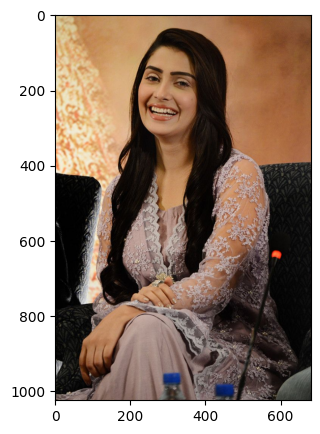

In [6]:
#Sample images
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

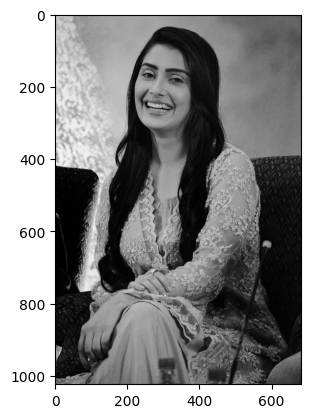

In [8]:
# Convert this image into Gray Scale
gray_img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [9]:
#Get the CaseCade
face_cas_cade=cv.CascadeClassifier('/content/drive/MyDrive/Image Classification/OpenCV HardCodeCase/haarcascade_frontalface_default.xml')
eye_cas_cade=cv.CascadeClassifier('/content/drive/MyDrive/Image Classification/OpenCV HardCodeCase/haarcascade_eye.xml')

face=face_cas_cade.detectMultiScale(gray_img,1.3,5)

face

array([[186,  91, 220, 220]], dtype=int32)

It detect the face in the image in which we have x,y,w,h parameters.

## 2.1 Detect the face of the sample image



In [10]:
x,y,w,h=face[0]
x,y,w,h

(186, 91, 220, 220)

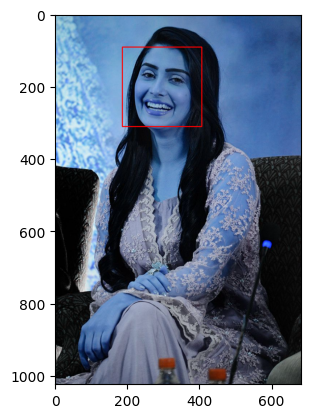

In [11]:
face_img=cv.rectangle(img=img.copy(),pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=2)
plt.imshow(face_img)

## 2.2 Detect the eye of sample image

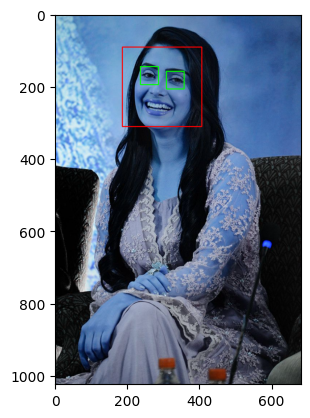

In [12]:
cv.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv.rectangle(img=img,pt1=(x,y),pt2=(x+w,y+h),color=(255,0,0),thickness=2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cas_cade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(img=roi_color,pt1=(ex,ey),pt2=(ex+ew,ey+eh),color=(0,255,0),thickness=2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

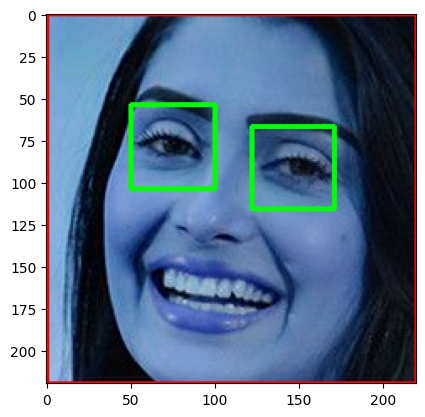

In [13]:
plt.imshow(roi_color,cmap='gray')

## 2.3 Implement on all the images

In [22]:
#Function for all the remaing images
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cas_cade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cas_cade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

**Testing on single image again**

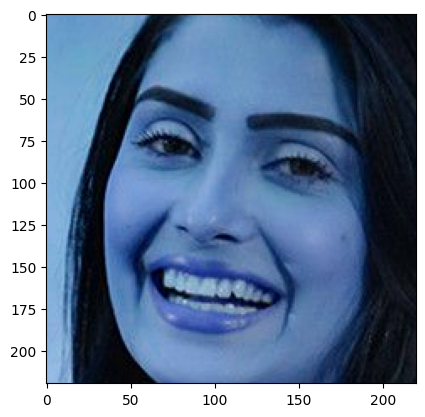

In [18]:
new_image=get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/2b540be269029a079c03f5f6d2c8b3a2.jpg')
plt.imshow(new_image)

**Implement on Noise Image**

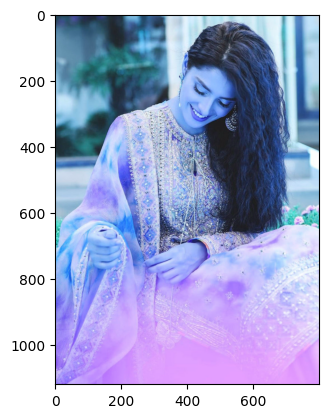

In [19]:
noise_img=cv.imread('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/9_3_79136af0-cd9a-4b83-9ce6-c3385f26fd44_800x.jpg')
plt.imshow(noise_img)

TypeError: ignored

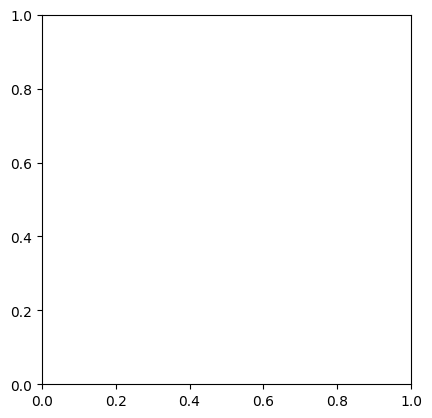

In [20]:
new_image=get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan/9_3_79136af0-cd9a-4b83-9ce6-c3385f26fd44_800x.jpg')
plt.imshow(new_image)

**Now Crop the images**

In [23]:
path_to_data = "/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset"
path_to_cr_data = "/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Cropped"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

        
img_dirs

['/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ali Zafar',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Feroze Khan',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Sajal Ali',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Humayo Saeed',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Fahad Mustafa',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayesha Umar',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Saba Qamar',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Ayza Khan',
 '/content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/Dataset/Fahad Khan',
 '/content/drive/MyDrive

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Ali Zafar
Generating cropped images in folder:  /content/drive/MyDrive/Image Classification/Pakistani Film stars Classifier with CNN/CroppedAli Zafar


error: ignored